# Comunicados de Política Monetaria
## Parte 1.

En este notebook crearemos un pandas DataFrame con las decisiones de política monetaria de Banxico y haremos un análisis de la información recabada.

In [3]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install requests_html

In [4]:
import re
import locale
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime

In [5]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

La información de decisción de política monetaria se encuentra en la siguiente url.

In [6]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

* Entra a `url` y analiza la página.

In [7]:
print(url)

https://www.banxico.org.mx/publicaciones-y-prensa/anuncios-de-las-decisiones-de-politica-monetaria/anuncios-politica-monetaria-t.html


* Como podemos observar, la url objetivo contiene
    * las fechas de decisiones de política monetaria,
    * el resumen de las decisiones de política monetaria y
    * una url que nos dirige a un pdf con el texto completo del Anuncio de Política Monetaria.
    
<h3 style="color:crimson">Ejercicio</h3>

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

In [8]:
#locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")

with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [9]:
def extract_info(anuncio):
    """
    Funcion que regresa en diccionario
    la información de un anuncio.
    """
    etiqueta_fecha = "td[class='bmdateview']"
    etiqueta_resumen = "td[class='bmtextview']"
    etiqueta_enlace = "a"
    
    elem_fecha = anuncio.find(etiqueta_fecha, first=True).text
    elem_fecha = datetime.strptime(elem_fecha, "%d/%m/%y").strftime("%Y-%m-%d")
    elem_res = anuncio.find(etiqueta_resumen, first=True)
    elem_res = re.findall(".+[^\n]", elem_res.text)[0]
    url_pdf = anuncio.find(etiqueta_enlace, first=True)
    url_pdf, *_ = url_pdf.absolute_links
    
    return {
        "date": elem_fecha,
        "text": elem_res,
        "url": url_pdf
    }

In [10]:
total_info  = []
with HTMLSession() as sess:
    r = sess.get(url)
    anuncios = r.html.find("tr")
    for anuncio in anuncios:
        info = extract_info(anuncio)
        total_info.append(info)
        
info_df = pd.DataFrame(total_info)

In [11]:
info_df.set_index(keys="date", inplace=True, drop=True)
info_df.index = pd.to_datetime(info_df.index)

In [12]:
comunicados_df = info_df["2008-02-15"::-1]
comunicados_df.head()

,text,url
date,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [11]:
comunicados_df.to_pickle("./comunicados-banxico.pkl")

<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

In [32]:
categoria = comunicados_df['text'].str.extract("(?P<category>mantiene|incrementa|disminuye)")
categoria.head()

,category
date,
2008-02-15,mantiene
2008-03-14,mantiene
2008-04-18,mantiene
2008-05-16,mantiene
2008-06-20,incrementa


In [40]:
comunicados_df.loc[:,'category'] = categoria['category']

e:\Users\fgarciaro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [42]:
comunicados_df.head()

,text,url,category
date,,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

In [59]:
comunicados_df['category'].value_counts()

mantiene      72
incrementa    18
disminuye     14
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

date
2008-02-15    0
2008-03-14    0
2008-04-18    0
2008-05-16    0
2008-06-20    1
             ..
2019-05-16    0
2019-06-27    0
2019-08-15   -1
2019-09-26   -1
2019-11-14   -1
Name: category, Length: 104, dtype: int64

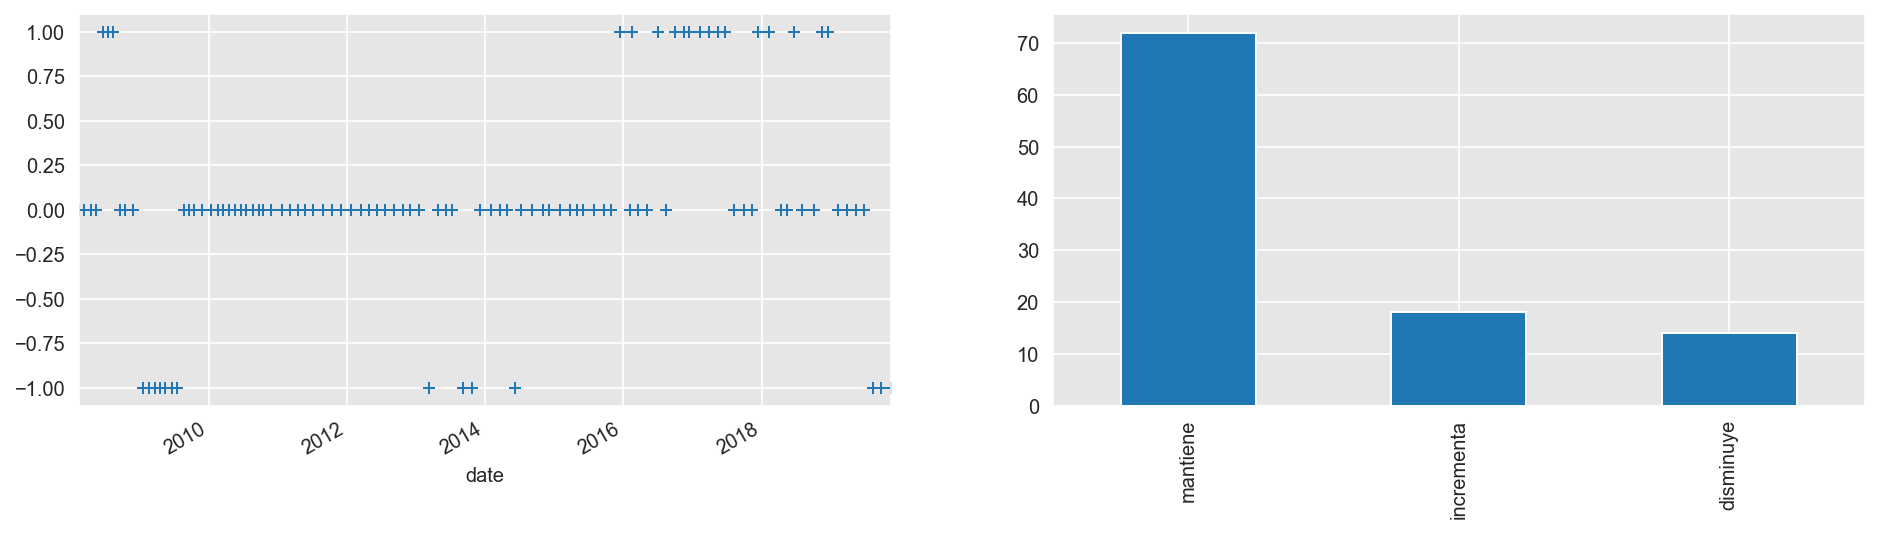

In [78]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
comunicados_df['category'].map({'incrementa': 1, 'mantiene': 0, 'disminuye':-1}).plot(ax = axes[0], style='+')
comunicados_df['category'].value_counts().plot(ax = axes[1], kind='bar')
plt.show();

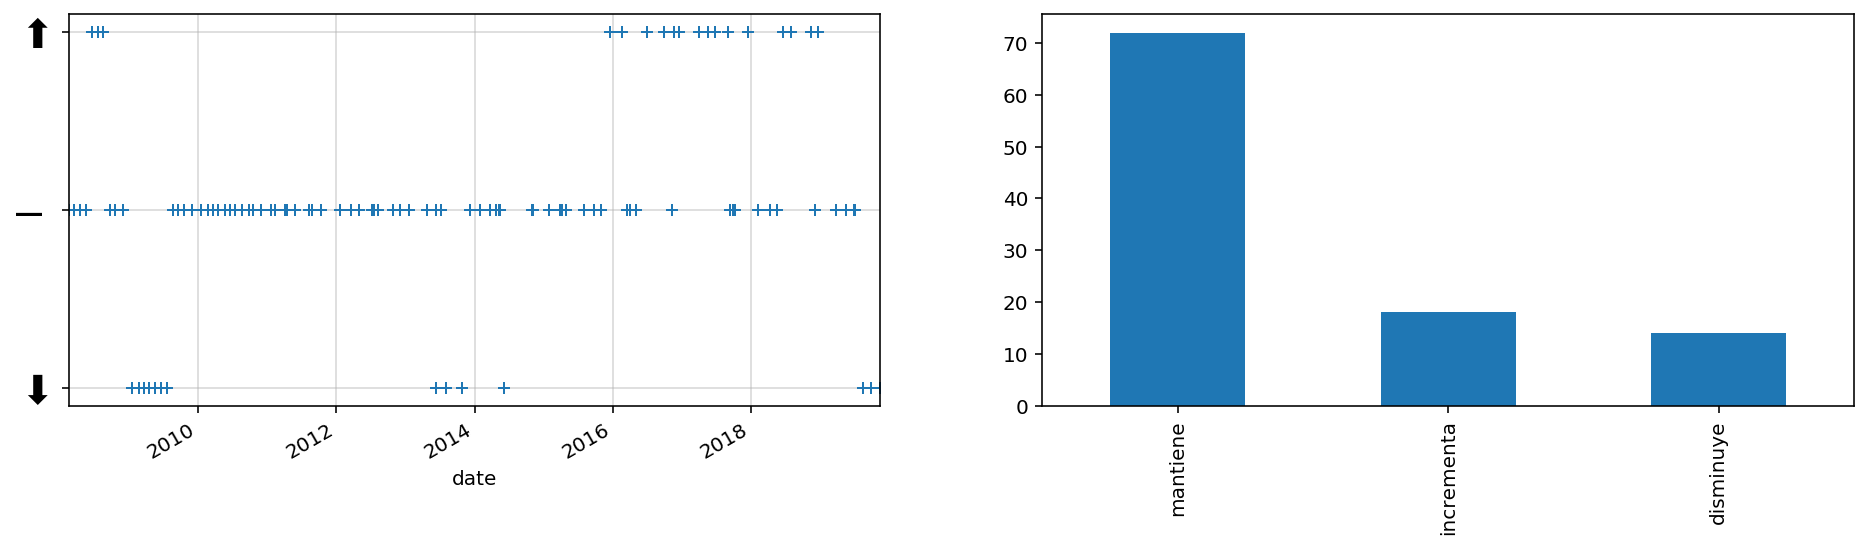

<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

In [131]:
agrupXyear = comunicados_df.groupby([comunicados_df.index.year, 'category'])['category'].count()
agrupXyear.head()

date  category  
2008  incrementa     3
      mantiene       7
2009  disminuye      7
      mantiene       4
2010  mantiene      11
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

In [154]:
tabla_year = agrupXyear.to_frame().unstack(level=0).T
tabla_year.index = tabla_year.index.droplevel(level=0)
tabla_year

category,disminuye,incrementa,mantiene
date,,,
2008,NaN,3.0,7.0
2009,7.0,NaN,4.0
2010,NaN,NaN,11.0
2011,NaN,NaN,8.0
2012,NaN,NaN,8.0
2013,3.0,NaN,5.0
2014,1.0,NaN,7.0
2015,NaN,1.0,7.0
2016,NaN,5.0,4.0


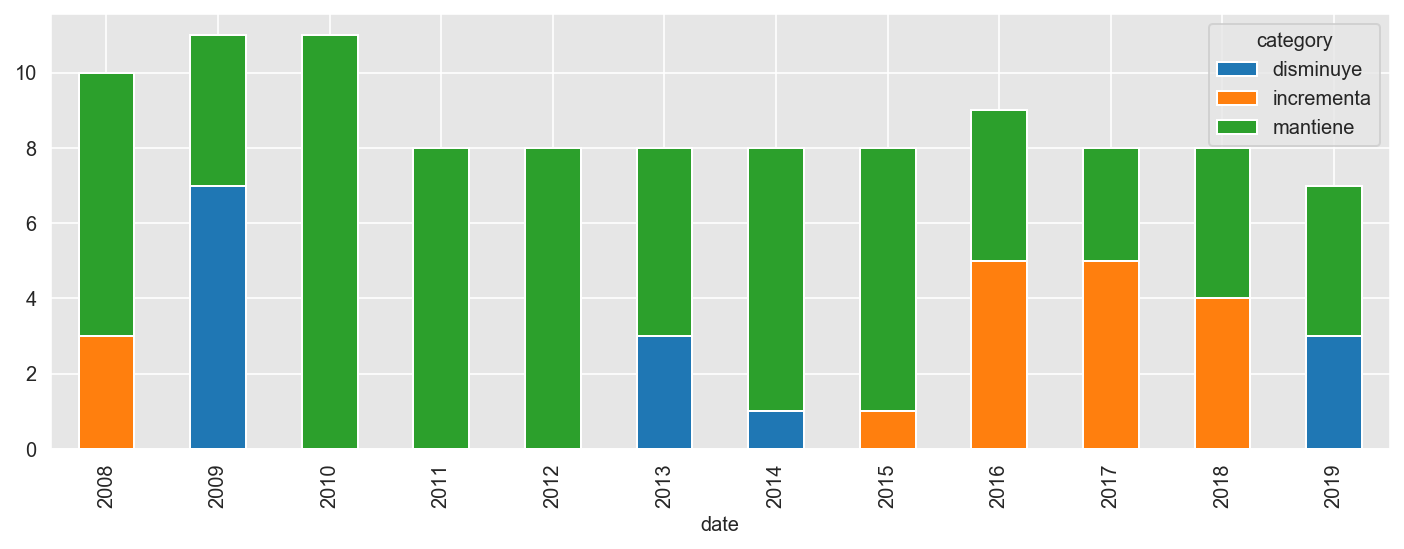

In [155]:
tabla_year.plot(kind='bar', stacked=True)
plt.show()

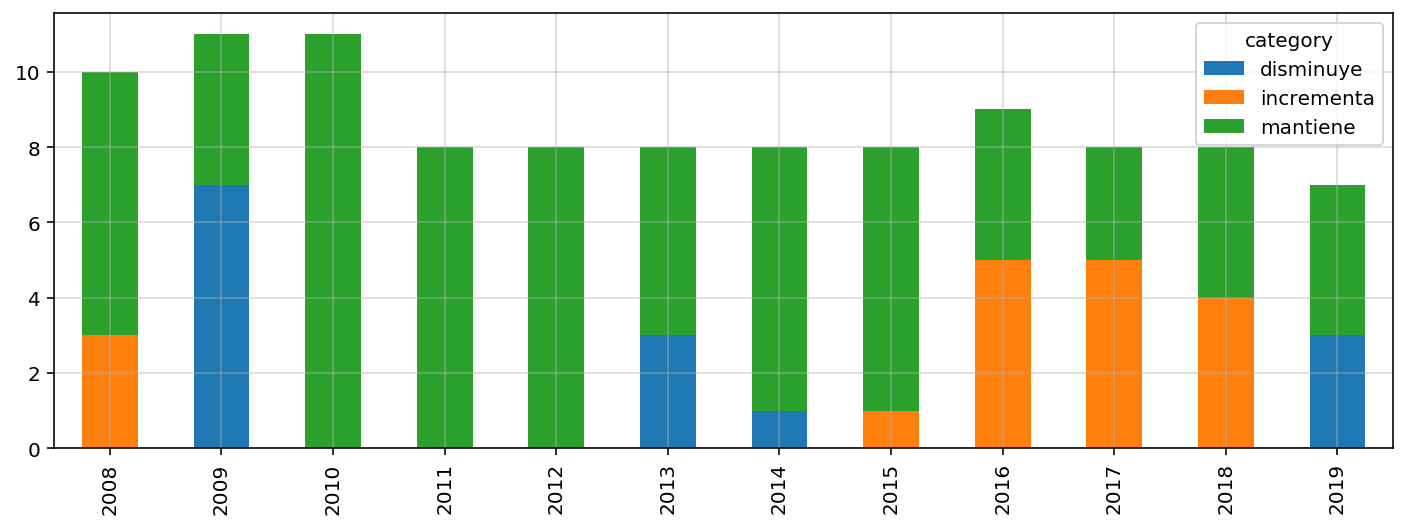